### Linear Regression
The file AnscombesQuartet.csv contains four data sets.   
Each set consists of 12 (x, y) pairs.   
Perform a linear regression on each data set, finding the slope and y-intercept for y1 as a function of x1;   
for y2 as a function of x2; for y3 as a function x3; and for y4 as a function of x4.   

For each data set, plot the 12 points as a scatter plot, and on the same plot, plot the line of linear regression, so that you can clearly see both the line and the markers.   

Round the slope and intercept to three significant figures and compare and contrast the results.   
What do you conclude and (a) linear regression; and (b) its applicability to this data set?   
(For comparison, the correct answers and plot can be found on the Wikipedia page for Anscombe’s Quartet.    
Try calculating the results and making the plot before you look up the Wikipedia page.)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('AnscombesQuartet.csv')

In [14]:
print(df)

    x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89


### Approach 1: Model linear regression using linear algebra

In [15]:
""" Linear regression model using linear algrebra notation
    Return a tuple (intercept, slope) of the linear approximation for the underlying data
    x, y: numpy arrays of x-coordinate and y-coordinate
"""
def linear_regression_algrebra(x, y): 
    X, Y = sum(x), sum(y) 
    A, C = sum(x * x), sum(x * y) 
    n    = len(x) 
    Del  = n * A - X * X 
    
    if Del == 0:
        print("System is singular!")
        return (0, 0) 
    
    a = (A * Y - X * C) / Del 
    b = (n * C - X * Y) / Del
    return (a, b)

x, y = np.array(df.x1), np.array(df.y1)

intercept_al, slope_al = linear_regression_algrebra(x, y)
print('intercept by linear algrebra = ', intercept_al)
print('slope by linear algrebra     = ', slope_al)

intercept by linear algrebra =  3.000090909090922
slope by linear algrebra     =  0.500090909090908


### Approach 2: Model linear regression using statistical method

In [16]:
""" Linear regression model using statistical notation
    Return a tuple (intercept, slope) of the linear approximation for the underlying data
    x, y: numpy arrays of x-coordinate and y-coordinate
"""
def linear_regression_stat(x, y): 
    mux, muy = np.mean(x), np.mean(y)
    sx, sy   = np.std(x, ddof=1), np.std(y, ddof=1)
    r        = np.corrcoef(x,y)[1, 0]
    b        = r * sy / sx
    a        = muy - b * mux
    
    return (a, b)

intercept_st, slope_st = linear_regression_stat(x, y)
print('intercept by statistical method = ', intercept_st)
print('slope by statistical method     = ', slope_st)

intercept by statistical method =  3.0000909090909103
slope by statistical method     =  0.5000909090909091


### Approach 3: Model linear regression using built-in scipy

In [17]:
""" Linear regression model using scipy
    Return a list of model params including [slope, intercept, ...]
    x, y: numpy arrays of x-coordinate and y-coordinate
"""
from scipy.stats import linregress
lr = linregress(x, y)
print('intercept by scipy method = ', lr[1])
print('slope by scipy method     = ', lr[0])

intercept by scipy method =  3.0000909090909103
slope by scipy method     =  0.5000909090909091


### Approach 4: Model linear regression using built-in scikit-learn

In [18]:
""" Linear regression model using scikit-learn
    x: numpy array of x-coordinate with shape (n_samples, n_features) 
    y: numpy arrays of y-coordinate with shape (n_samples, ) or (n_samples, n_targets)
"""
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = x.reshape(-1, 1)
model.fit(X, y)
print('intercept by LinearRegression function = ', model.intercept_)
print('slope by LinearRegression function     = ', model.coef_[0])

intercept by LinearRegression function =  3.0000909090909103
slope by LinearRegression function     =  0.5000909090909091


### Plot and compare the Anscombes Quartet 

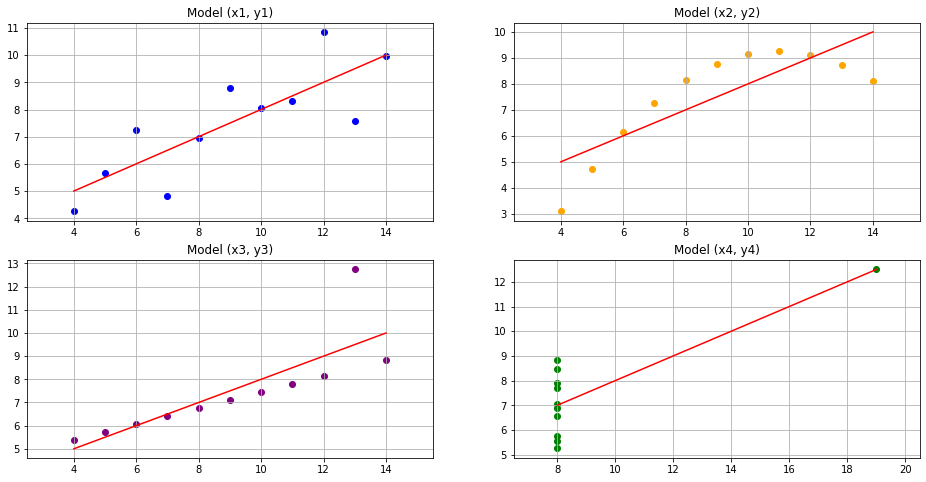

In [19]:
# Index the columns of the dataframe
df.columns = list(range(8))

# Number of pair (x, y)
n_pairs = len(df.columns) // 2

# List contains the slopes anf intercepts of all models
model_params = []

# Set up subplots
n_rows, n_cols = 2, n_pairs // 2
colors = ['blue', 'orange', 'purple', 'green', 'red']
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(16, 8)

# Draw the scatter plot and best-fit line
for k in range(n_pairs):
    # Process input data
    X = np.array(df[2 * k]).reshape(-1, 1)
    y = np.array(df[2 * k + 1])
    
    # Plot scatter
    ax = axes[k // 2][k % 2]
    ax.scatter(X, y, color=colors[k])
    ax.set_xlim(min(X) - 1.5, max(X) + 1.5)
    ax.grid()
    ax.set_title('Model (x{}, y{})'.format(k + 1, k + 1))
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Plot the best-fit line
    model_params.append((model.coef_[0], model.intercept_))
    X_b = np.array([min(X), max(X)])
    y_b = X_b * model.coef_[0] + model.intercept_
    ax.plot(X_b, y_b, color=colors[-1])
    
plt.show()

### Print out the slope and intercept resulting from modeling each of the Anscombes Quartet

In [20]:
for k, pair in enumerate(model_params):
    print('Model #{}:'.format(k + 1))
    print('\tslope = {:.3f}, and intercept = {:.3f}'.format(pair[0], pair[1]))

Model #1:
	slope = 0.500, and intercept = 3.000
Model #2:
	slope = 0.500, and intercept = 3.001
Model #3:
	slope = 0.500, and intercept = 3.002
Model #4:
	slope = 0.500, and intercept = 3.002


### Conclusion
Although 4 data set of pairs can be described by an identical linear regression, they have different distributions.   
The the data in first quarter (top left) my be best described by the model among the quartet.  
The the data in second quarter (top right) my be best charaterized by a polynomial regression model.  
The bottom two models become influenced by outliners.  

*The regression itself cannot tell all about the dataset.*